# Snoring Classification

## 라이브러리 불러오기

In [1]:
import os
import pathlib
import librosa
import librosa.display
import soundfile as sf

import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import tensorflow as tf
import IPython.display as ipd
import pandas as pd

from tensorflow.keras import layers
from tensorflow.keras import models
from scipy.io import wavfile


2024-09-08 20:33:14.854244: I tensorflow/core/util/port.cc:111] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-09-08 20:33:14.890369: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-09-08 20:33:14.890400: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-09-08 20:33:14.890422: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-09-08 20:33:14.897796: I tensorflow/core/platform/cpu_feature_g

## 데이터셋 가져오기

In [2]:
cur_path = os.getcwd()
print(cur_path)

train_audio_lists = os.listdir(cur_path + '/SnoringDataset/train/audio_recordings')
train_label_lists = os.listdir(cur_path + '/SnoringDataset/train/audio_labels')

test_audio_lists = os.listdir(cur_path + '/SnoringDataset/test/audio_recordings')
test_label_lists = os.listdir(cur_path + '/SnoringDataset/test/audio_labels')

train_audio_lists = sorted(train_audio_lists, key = lambda x : (len(x), x))
train_label_lists = sorted(train_label_lists, key = lambda x : (len(x), x))

test_audio_lists = sorted(test_audio_lists, key = lambda x : (len(x), x))
test_label_lists = sorted(test_label_lists, key = lambda x : (len(x), x))

print(train_audio_lists)
print(train_label_lists)
print(test_audio_lists)
print(test_label_lists)


/home/geongsang/TensorFlowLab/0B_SnoringAudioRecog
['0_0.wav', '0_1.wav', '0_2.wav', '0_3.wav', '0_4.wav', '0_5.wav', '0_6.wav', '0_7.wav', '0_8.wav', '0_9.wav', '1_0.wav', '1_1.wav', '1_2.wav', '1_3.wav', '1_4.wav', '1_5.wav', '1_6.wav', '1_7.wav', '1_8.wav', '1_9.wav', '0_10.wav', '0_11.wav', '0_12.wav', '0_13.wav', '0_14.wav', '0_15.wav', '0_16.wav', '0_17.wav', '0_18.wav', '0_19.wav', '0_20.wav', '0_21.wav', '0_22.wav', '0_23.wav', '0_24.wav', '0_25.wav', '0_26.wav', '0_27.wav', '0_28.wav', '0_29.wav', '0_30.wav', '0_31.wav', '0_32.wav', '0_33.wav', '0_34.wav', '0_35.wav', '0_36.wav', '0_37.wav', '0_38.wav', '0_39.wav', '0_40.wav', '0_41.wav', '0_42.wav', '0_43.wav', '0_44.wav', '0_45.wav', '0_46.wav', '0_47.wav', '0_48.wav', '0_49.wav', '0_50.wav', '0_51.wav', '0_52.wav', '0_53.wav', '0_54.wav', '0_55.wav', '0_56.wav', '0_57.wav', '0_58.wav', '0_59.wav', '0_60.wav', '0_61.wav', '0_62.wav', '0_63.wav', '0_64.wav', '0_65.wav', '0_66.wav', '0_67.wav', '0_68.wav', '0_69.wav', '0_70.wa

In [3]:
cur_path = os.getcwd()
print(cur_path)
train_audio_path = './SnoringDataset/train/audio_recordings'
train_label_path = './SnoringDataset/train/audio_labels'

train_audio_dict = {}
train_audio_list = []
train_sampling_list = []
train_label_list = []

for train_audio in train_audio_lists:
    audio, sr = librosa.load(train_audio_path + '/' + train_audio)
    train_audio_list.append(audio)
    train_sampling_list.append(sr)
print(len(train_audio_list))
print(len(train_sampling_list))

for train_label in train_label_lists:
    f = open(train_label_path + '/' + train_label)
    label = f.readline()
    train_label_list.append(label)
print(len(train_label_list))

train_audio_dict['audio'] = np.array(train_audio_list)
train_audio_dict['sampling'] = np.array(train_sampling_list)
train_audio_dict['label'] = np.array(train_label_list)

print(train_audio_dict.keys())
print(train_audio_dict['label'])

/home/geongsang/TensorFlowLab/0B_SnoringAudioRecog
700
700
700
dict_keys(['audio', 'sampling', 'label'])
['0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '1' '1' '1' '1' '1' '1' '1' '1'
 '1' '1' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0'
 '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0'
 '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0'
 '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0'
 '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0'
 '0' '0' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1'
 '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1'
 '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1'
 '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1'
 '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1'
 '1' '1' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0'
 '0' '0' '0' '0' '0

In [4]:
cur_path = os.getcwd()
print(cur_path)
test_audio_path = './SnoringDataset/test/audio_recordings'
test_label_path = './SnoringDataset/test/audio_labels'

test_audio_dict = {}
test_audio_list = []
test_sampling_list = []
test_label_list = []

for test_audio in test_audio_lists:
    audio, sr = librosa.load(test_audio_path + '/' + test_audio)
    test_audio_list.append(audio)
    test_sampling_list.append(sr)
print(len(test_audio_list))
print(len(test_sampling_list))

for test_label in test_label_lists:
    f = open(test_label_path + '/' + test_label)
    label = f.readline()
    test_label_list.append(label)
print(len(test_label_list))

test_audio_dict['audio'] = np.array(test_audio_list)
test_audio_dict['sampling'] = np.array(test_sampling_list)
test_audio_dict['label'] = np.array(test_label_list)

print(test_audio_dict.keys())
print(test_audio_dict['label'])

/home/geongsang/TensorFlowLab/0B_SnoringAudioRecog
300
300
300
dict_keys(['audio', 'sampling', 'label'])
['0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0'
 '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0'
 '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0'
 '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0'
 '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0'
 '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0'
 '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0'
 '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0'
 '0' '0' '0' '0' '0' '0' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1'
 '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1'
 '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1'
 '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1'
 '1' '1' '1' '1' '1

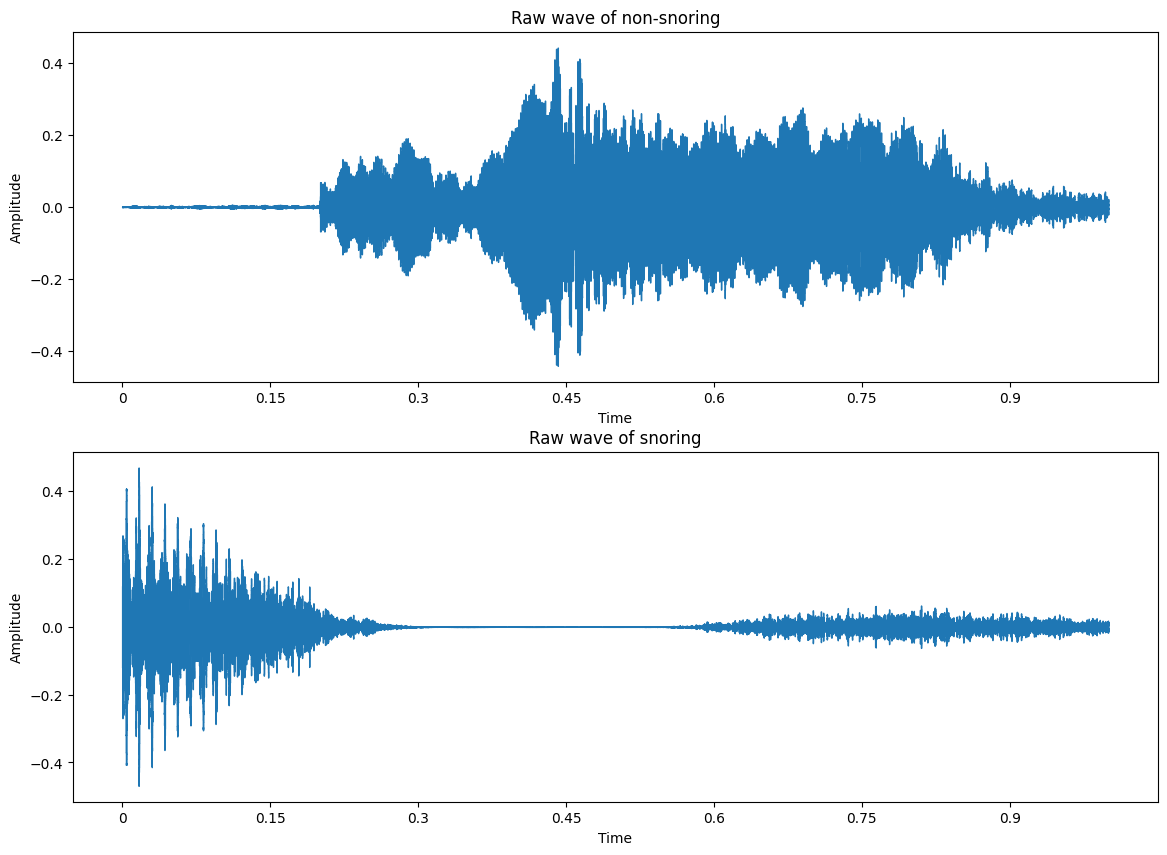

In [5]:
# 샘플 하나를 가져와서 진폭-시간그래프 확인

fig = plt.figure(figsize=(14, 10))
ax1 = fig.add_subplot(211)
ax1.set_title('Raw wave of non-snoring')
ax1.set_xlabel('Time')
ax1.set_ylabel('Amplitude')
librosa.display.waveshow(y=train_audio_list[0], sr=train_sampling_list[0])

ax1 = fig.add_subplot(212)
ax1.set_title('Raw wave of snoring')
ax1.set_xlabel('Time')
ax1.set_ylabel('Amplitude')
librosa.display.waveshow(y=train_audio_list[11], sr=train_sampling_list[11])

In [6]:
ipd.Audio(train_audio_list[0], rate=16000)

In [7]:
ipd.Audio(train_audio_list[11], rate=16000)

(array([  0.,   0.,   0.,   0.,   0., 700.,   0.,   0.,   0.,   0.]),
 array([0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2, 1.3, 1.4, 1.5]),
 <BarContainer object of 10 artists>)

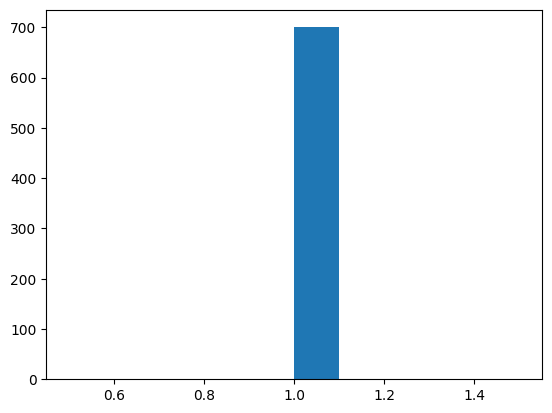

In [8]:
duration_of_recordings = []

for train_audio in train_audio_lists:
    sample_rate, samples = wavfile.read('/home/geongsang/TensorFlowLab/0B_SnoringAudioRecog/SnoringDataset/train/audio_recordings/' + train_audio)
    duration_of_recordings.append(float(len(samples)/sample_rate))

plt.hist(np.array(duration_of_recordings))

(array([  0.,   0.,   0.,   0.,   0., 300.,   0.,   0.,   0.,   0.]),
 array([0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2, 1.3, 1.4, 1.5]),
 <BarContainer object of 10 artists>)

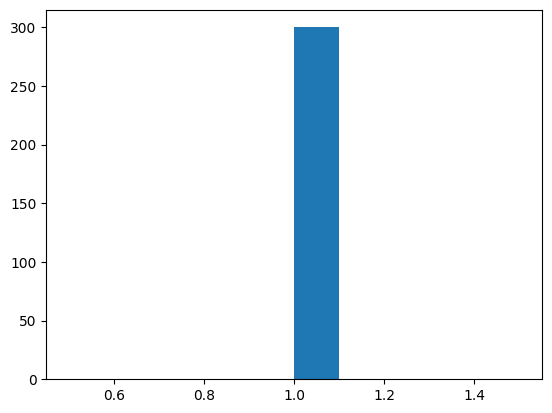

In [9]:
duration_of_recordings = []

for test_audio in test_audio_lists:
    sample_rate, samples = wavfile.read('/home/geongsang/TensorFlowLab/0B_SnoringAudioRecog/SnoringDataset/test/audio_recordings/' + test_audio)
    duration_of_recordings.append(float(len(samples)/sample_rate))

plt.hist(np.array(duration_of_recordings))

In [10]:
print(train_audio_dict['audio'].shape)
print(train_audio_dict['label'].shape)
print(test_audio_dict['audio'].shape)
print(test_audio_dict['label'].shape)

X_train = train_audio_dict['audio']
X_valid = test_audio_dict['audio']

y_train = train_audio_dict['label']
y_valid = test_audio_dict['label']

# y_train = pd.get_dummies(y_train)
# y_valid = pd.get_dummies(y_valid)

y_train = y_train.astype(np.float32)
y_valid = y_valid.astype(np.float32)


X_train = np.expand_dims(X_train, axis=-1)
X_valid = np.expand_dims(X_valid, axis=-1)
y_train = np.expand_dims(y_train, axis=-1)
y_valid = np.expand_dims(y_valid, axis=-1)

print()
print(X_train.shape)
print(X_valid.shape)
print(y_train.shape)
print(y_valid.shape)

print(type(X_train[0][0][0]))
print(type(y_valid[0][0]))



(700, 22050)
(700,)
(300, 22050)
(300,)

(700, 22050, 1)
(300, 22050, 1)
(700, 1)
(300, 1)
<class 'numpy.float32'>
<class 'numpy.float32'>


## 모델링

In [11]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Conv1D, Flatten, Reshape, MaxPooling1D, Dropout

def SnoringDetection():

    inputs = Input(shape = X_train.shape[1:], name = 'Input')

    x = Conv1D(8, 13, padding = 'valid', activation = 'relu', strides = 1, name='Conv_01')(inputs)
    x = MaxPooling1D(3, name='MaxPool1D_01')(x)
    x = Dropout(0.2, name = 'Dropout_01')(x)

    x = Conv1D(16, 9, padding = 'valid', activation = 'relu', strides = 1, name = 'Conv_02')(x)
    x = MaxPooling1D(3, name='MaxPool1D_02')(x)
    x = Dropout(0.2, name = 'Dropout_02')(x)

    x = Conv1D(32, 7, padding = 'valid', activation = 'relu', strides = 1, name = 'Conv_03')(x)
    x = MaxPooling1D(3, name = 'MaxPool1D_03')(x)
    x = Dropout(0.2, name = 'Dropout_03')(x)



    x = Flatten()(x)

    x = Dense(4, activation='relu', name = 'Dense')(x)
    x = Dropout(0.2)(x)


    outputs = Dense(units = 1, activation = 'sigmoid' , name = 'output')(x)

    return Model(inputs, outputs, name = 'SnoringDetection')


In [12]:
model = SnoringDetection()
model.summary()

Model: "SnoringDetection"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Input (InputLayer)          [(None, 22050, 1)]        0         
                                                                 
 Conv_01 (Conv1D)            (None, 22038, 8)          112       
                                                                 
 MaxPool1D_01 (MaxPooling1D  (None, 7346, 8)           0         
 )                                                               
                                                                 
 Dropout_01 (Dropout)        (None, 7346, 8)           0         
                                                                 
 Conv_02 (Conv1D)            (None, 7338, 16)          1168      
                                                                 
 MaxPool1D_02 (MaxPooling1D  (None, 2446, 16)          0         
 )                                                

2024-09-08 20:33:19.738929: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1886] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 22446 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 3090, pci bus id: 0000:3b:00.0, compute capability: 8.6
2024-09-08 20:33:19.739608: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1886] Created device /job:localhost/replica:0/task:0/device:GPU:1 with 22446 MB memory:  -> device: 1, name: NVIDIA GeForce RTX 3090, pci bus id: 0000:5e:00.0, compute capability: 8.6
2024-09-08 20:33:19.740118: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1886] Created device /job:localhost/replica:0/task:0/device:GPU:2 with 22446 MB memory:  -> device: 2, name: NVIDIA GeForce RTX 3090, pci bus id: 0000:86:00.0, compute capability: 8.6
2024-09-08 20:33:19.740581: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1886] Created device /job:localhost/replica:0/task:0/device:GPU:3 with 22446 MB memory:  -> device: 3, name: NVIDIA GeForce RTX 3090

In [13]:
model.compile(optimizer='adam', 
              loss='binary_crossentropy', 
              metrics=['accuracy'])

In [14]:
history = model.fit(X_train, y_train, epochs=40, batch_size=16, validation_data=(X_valid, y_valid))

Epoch 1/40


2024-09-08 20:33:21.308722: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:442] Loaded cuDNN version 8902
2024-09-08 20:33:21.372266: I tensorflow/tsl/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2024-09-08 20:33:21.555233: I tensorflow/tsl/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2024-09-08 20:33:23.006469: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x7f8bacab3c10 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2024-09-08 20:33:23.006498: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (0): NVIDIA GeForce RTX 3090, Compute Capability 8.6
2024-09-08 20:33:23.006503: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (1): NVIDIA GeForce RTX 3090, Compute Capability 8.6
2024-09-08 20:33:23.006507: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor de

44/44 [==============================] - 5s 27ms/step - loss: 0.6724 - accuracy: 0.5843 - val_loss: 0.6761 - val_accuracy: 0.4433
Epoch 2/40
44/44 [==============================] - 1s 14ms/step - loss: 0.6024 - accuracy: 0.7043 - val_loss: 0.6516 - val_accuracy: 0.4967
Epoch 3/40
44/44 [==============================] - 1s 14ms/step - loss: 0.5698 - accuracy: 0.7100 - val_loss: 0.6154 - val_accuracy: 0.5333
Epoch 4/40
44/44 [==============================] - 1s 14ms/step - loss: 0.5479 - accuracy: 0.7571 - val_loss: 0.6196 - val_accuracy: 0.5233
Epoch 5/40
44/44 [==============================] - 1s 15ms/step - loss: 0.5403 - accuracy: 0.7543 - val_loss: 0.6196 - val_accuracy: 0.5067
Epoch 6/40
44/44 [==============================] - 1s 15ms/step - loss: 0.5219 - accuracy: 0.7686 - val_loss: 0.7184 - val_accuracy: 0.4633
Epoch 7/40
44/44 [==============================] - 1s 14ms/step - loss: 0.5044 - accuracy: 0.7857 - val_loss: 0.8687 - val_accuracy: 0.4800
Epoch 8/40
44/44 [======

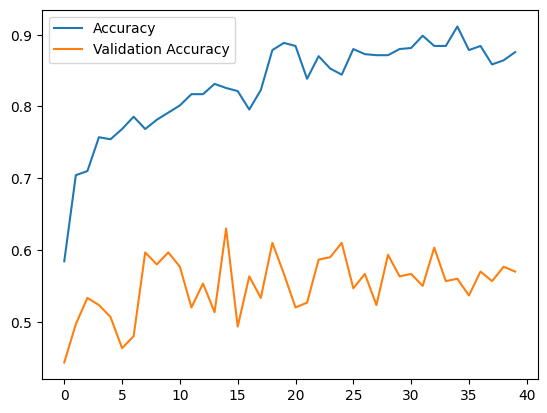

In [20]:
plt.figure()
plt.plot(history.history['accuracy'], label = 'Accuracy')
plt.plot(history.history['val_accuracy'], label = 'Validation Accuracy')
plt.legend()
plt.show()

In [16]:
# num = 160
num = 42

test_audio = X_valid[num]
print(y_valid[num])
test_audio = np.expand_dims(test_audio, axis = 0)
print(test_audio.shape)

pred = model.predict(test_audio)
print(pred)

[0.]
(1, 22050, 1)
1/1 [==============================] - 0s 159ms/step
[[0.26193994]]


In [17]:
print(type(test_audio))
test_audio = list(test_audio)
test_audio = np.squeeze(test_audio)
print(test_audio.shape)
print(type(test_audio))
print(test_audio)

<class 'numpy.ndarray'>
(22050,)
<class 'numpy.ndarray'>
[0.00592041 0.00854492 0.0038147  ... 0.05499268 0.04840088 0.03268433]


In [18]:
ipd.Audio(test_audio, rate=16000)